#### fetching data from collab

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


\

## Prerequisite for chronos

In [4]:
pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-plq3_iz6
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-plq3_iz6
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit afd9cfd062b60ca1ba8d7c9daef7dc820489db0a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl 

## sample script

In [14]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):

  """
  Predicts and plots cryptocurrency data for multiple coins.

  Args:
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names (e.g., 'BTC', 'ETH'), values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """

  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")


  # Initialize Chronos pipeline once outside the loop for efficiency
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  predictions = {}  # Create an empty dictionary to store results

  for coin_name, csv_file in crypto_data_dict.items():
    # Load data for the specific coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)


    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    predictions[coin_name] = {  # Add results to the dictionary
          "median": median,
          "low": low,
          "high": high
      }


    # Plot and visualize predictions (replace with your desired plotting logic)
    plt.plot(df["Close"], label="Actual")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.legend()
    plt.show()

  return predictions  # Return the dictionary containing predictions

# Example usage
crypto_data = {
  'BTC' : "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
  'BNB' : "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
  'ETH' : "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}




/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


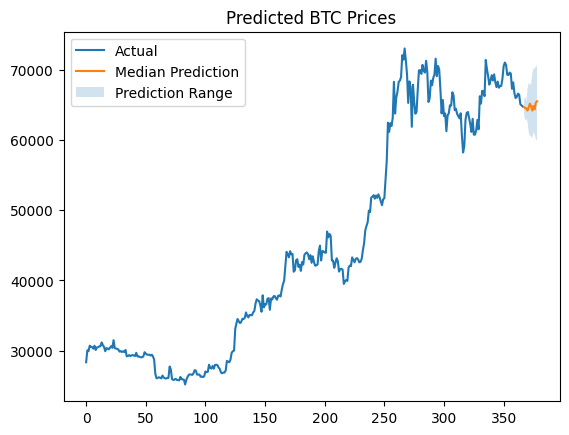

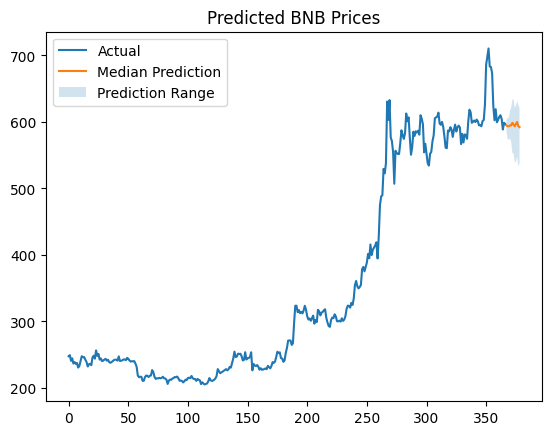

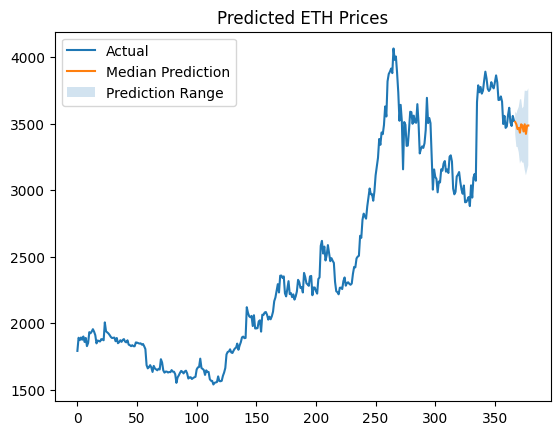

In [15]:
crypto_predictions = predict_and_plot_crypto_data(crypto_data)

# Access predictions for a specific coin (e.g., 'BTC')
btc_predictions = crypto_predictions['BTC']



In [16]:
# Print the median predicted values for all coins
for coin, prediction in crypto_predictions.items():
  print(f"Coin: {coin}, Median Prediction: {prediction['median']}")

Coin: BTC, Median Prediction: [64722.04095661 64557.35399303 64557.35399303 64227.98006586
 64722.04095661 65216.10184736 64886.72792019 64227.98006586
 64886.72792019 64392.66702944 65380.78881095 65545.47577453]
Coin: BNB, Median Prediction: [594.73070968 593.43215119 593.43215119 594.73070968 594.73070968
 598.62632181 596.02924706 593.43215119 597.32778443 599.92485919
 593.43215119 592.1335927 ]
Coin: ETH, Median Prediction: [3514.24476617 3496.22272314 3460.17922314 3469.19009814 3433.14659814
 3496.22286966 3487.21184814 3442.15747314 3496.22286966 3424.13572314
 3487.21184814 3487.21199466]


In [27]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
  """
  Predicts and plots cryptocurrency data for a single coin.

  Args:
      coin_name: Name of the cryptocurrency (e.g., 'BTC', 'ETH').
      crypto_data_dict: Dictionary containing data for each cryptocurrency.
          Keys should be coin names, values should be file paths to CSV data.
      model_name: Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
      prediction_length: Number of future data points to predict (default: 12).
      num_samples: Number of prediction samples to generate (default: 20).
  """



  # Check if coin exists in data
  if coin_name not in crypto_data_dict:
      raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

  # Load data for the specified coin
  csv_file = crypto_data_dict[coin_name]
  df = pd.read_csv(csv_file)

  # Initialize Chronos pipeline (can be inside or outside depending on preference)
  pipeline = ChronosPipeline.from_pretrained(
      model_name,
      device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
      torch_dtype=torch.bfloat16,
  )

  # Perform prediction
  forecast = pipeline.predict(
      context=torch.tensor(df["Close"]),
      prediction_length=prediction_length,
      num_samples=num_samples,
  )

  # Generate forecast index for plotting
  forecast_index = range(len(df), len(df) + prediction_length)
  low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

  # Plot and visualize predictions (replace with your desired plotting logic)
  plt.plot(df["Close"], label="Actual")
  plt.plot(forecast_index, median, label="Median Prediction")
  plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
  plt.title(f"Predicted {coin_name} Prices")
  plt.legend()
  plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


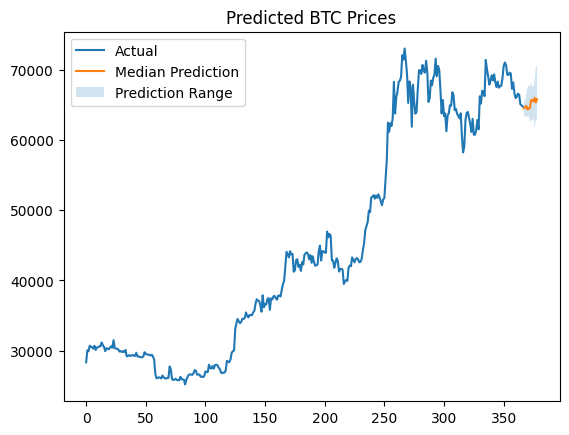

In [28]:
# Example usage (assuming crypto_data_dict is defined)
predict_and_plot_crypto_data('BTC', crypto_data_dict)  # Call for Bitcoin

## Final version

In [29]:
import pandas as pd
import torch
from chronos import ChronosPipeline
import matplotlib.pyplot as plt
import numpy as np


# Define the crypto coins data source dictionary
crypto_data_dict = {
    'BTC': "/content/drive/MyDrive/backtesting/datas/yfinance/BTC-USD.csv",
    'BNB': "/content/drive/MyDrive/backtesting/datas/yfinance/BNB-USD.csv",
    'ETH': "/content/drive/MyDrive/backtesting/datas/yfinance/ETH-USD.csv"
}

def predict_and_plot_crypto_data(
    coin_name,
    crypto_data_dict,
    model_name="amazon/chronos-t5-small",
    prediction_length=12,
    num_samples=20):
    """
    Predicts and plots cryptocurrency data for a single coin.

    Args:
        coin_name (str): Name of the cryptocurrency (e.g., 'BTC', 'ETH').
        crypto_data_dict (dict): Dictionary containing data for each cryptocurrency.
            Keys should be coin names, values should be file paths to CSV data.
        model_name (str): Name of the pre-trained Chronos model (default: "amazon/chronos-t5-small").
        prediction_length (int): Number of future data points to predict (default: 12).
        num_samples (int): Number of prediction samples to generate (default: 20).

    Raises:
        ValueError: If coin_name is not found in crypto_data_dict.

    Returns:
        tuple: Tuple containing forecast index and median prediction array.
    """

    # Check if coin exists in data
    if coin_name not in crypto_data_dict:
        raise ValueError(f"Coin '{coin_name}' not found in data dictionary.")

    # Load data for the specified coin
    csv_file = crypto_data_dict[coin_name]
    df = pd.read_csv(csv_file)

    # Initialize Chronos pipeline
    pipeline = ChronosPipeline.from_pretrained(
        model_name,
        device_map="cpu",  # use "cpu" for CPU inference and "mps" for Apple Silicon
        torch_dtype=torch.bfloat16,
    )

    # Perform prediction
    forecast = pipeline.predict(
        context=torch.tensor(df["Close"]),
        prediction_length=prediction_length,
        num_samples=num_samples,
    )

    # Generate forecast index for plotting
    forecast_index = range(len(df), len(df) + prediction_length)
    low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

    # Plot and visualize predictions
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(df["Close"], label="History")
    plt.plot(forecast_index, median, label="Median Prediction")
    plt.fill_between(forecast_index, low, high, alpha=0.2, label="Prediction Range")
    plt.title(f"Predicted {coin_name} Prices")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)  # Add gridlines
    plt.show()

    return forecast_index, median  # Optionally return forecast data for further use


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


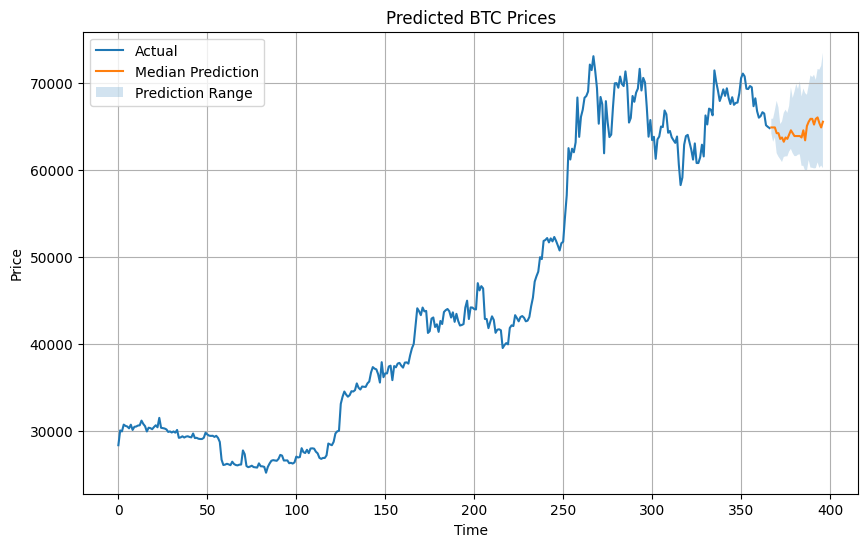

(range(367, 397),
 array([64886.72792019, 64886.72792019, 64886.72792019, 64227.98006586,
        64227.98006586, 63569.22685585, 63733.91381943, 63239.85292868,
        63733.91381943, 63569.22685585, 64063.29042444, 64557.35399303,
        64227.98006586, 63898.60078302, 63898.60078302, 63898.60078302,
        63898.60346085, 63733.91381943, 64557.35131519, 63404.53989226,
        65051.41488378, 65545.47577453, 65874.8497017 , 65874.8497017 ,
        65216.10184736, 65874.8497017 , 66039.53666528, 65380.78881095,
        64886.72792019, 65545.47577453]))

In [31]:
predict_and_plot_crypto_data('BTC',crypto_data_dict, prediction_length=30)